In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import pingouin as pg
sns.set_theme(style="darkgrid")

In [6]:
df=pd.read_excel('C:/Users/PARLA/Downloads/supermarket_sales.xlsx')
df
#adding the data frame and printing the data frame

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,CT3,Normal,Male,PD1,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,CT9,Normal,Female,PD3,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,CT1,Member,Male,PD5,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,CT1,Normal,Male,PD3,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

Using df.info as it provides the non null values and datatypes of the variables 
Here Unit price is not in numeric and time is in object insted of date time format so we are going to convert it later on

In [8]:
df.columns
#identifying the variables present in the data frame

Index(['Invoice ID', 'Branch', 'city code ', 'Customer type', 'Gender',
       'Product code', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [9]:
df.shape
#there are 1000 rows and 17 columns 

(1000, 17)

In [10]:
df.size
# there are 17000 elements

17000

In [11]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
city code                  0
Customer type              0
Gender                     0
Product code               0
Unit price                 4
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     7
dtype: int64

In [ ]:
#there are 4null values in unit price and 7 null values in rating

In [12]:
#as the values are too small and it cant effect the data set even if we remove it so we are going to drop the null values
df.dropna(inplace=True)

In [13]:
pd.to_numeric(df['Unit price'])

ValueError: Unable to parse string "-" at position 8

Here we can see that there is sum value not allowing the Unit price to convert so we are going to check it

In [14]:
df[df['Unit price']== '-']

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
8,665-32-9167,A,CT1,Member,Female,PD1,-,2,3.6260,76.1460,2019-01-10,17:15:00,Credit card,72.52,4.761905,3.6260,7.2
829,416-17-9926,A,CT1,Member,Female,PD2,-,10,37.1100,779.3100,2019-01-01,14:42:00,Credit card,742.20,4.761905,37.1100,4.3
852,658-66-3967,C,CT3,Normal,Male,PD1,-,7,18.6165,390.9465,2019-01-14,15:42:00,Ewallet,372.33,4.761905,18.6165,5.0
902,595-94-9924,A,CT1,Member,Female,PD1,-,5,6.9325,145.5825,2019-03-26,20:21:00,Credit card,138.65,4.761905,6.9325,4.2
950,503-21-4385,B,CT9,Member,Male,PD1,-,3,5.9865,125.7165,2019-02-21,12:40:00,Ewallet,119.73,4.761905,5.9865,9.3


as we can see there are 5 rows with - as variableso we are going to delete those rows

In [15]:
df=df[df['Unit price']!= '-']
df

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,CT3,Normal,Male,PD1,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,CT9,Normal,Female,PD3,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,CT1,Member,Male,PD5,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,CT1,Normal,Male,PD3,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


here we have removed the rows and after removing them there are 984 rows in data frame

In [16]:
df['Time']=pd.to_datetime(df['Time'],format='%H:%M:%S')
df['Time']


<ipython-input-16-632e464ab64d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time']=pd.to_datetime(df['Time'],format='%H:%M:%S')


0     1900-01-01 13:08:00
1     1900-01-01 10:29:00
2     1900-01-01 13:23:00
3     1900-01-01 20:33:00
4     1900-01-01 10:37:00
              ...        
995   1900-01-01 13:46:00
996   1900-01-01 17:16:00
997   1900-01-01 13:22:00
998   1900-01-01 15:33:00
999   1900-01-01 13:28:00
Name: Time, Length: 984, dtype: datetime64[ns]

Converted the time into datetime format as it will be available when used in date time format instead of 'object' format.

In [18]:
#checking if all the variables are in correct format and there are no null values in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               984 non-null    object        
 1   Branch                   984 non-null    object        
 2   city code                984 non-null    object        
 3   Customer type            984 non-null    object        
 4   Gender                   984 non-null    object        
 5   Product code             984 non-null    object        
 6   Unit price               984 non-null    object        
 7   Quantity                 984 non-null    int64         
 8   Tax 5%                   984 non-null    float64       
 9   Total                    984 non-null    float64       
 10  Date                     984 non-null    datetime64[ns]
 11  Time                     984 non-null    datetime64[ns]
 12  Payment                  984 non-nul

Now we are going add some required columns and remove some unnecessary columns

In [19]:
df['Weekday']=df['Date'].dt.day_name()
df

<ipython-input-19-b76378abf62f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday']=df['Date'].dt.day_name()


,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,CT3,Normal,Male,PD1,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday
996,303-96-2227,B,CT9,Normal,Female,PD3,97.38,10,48.6900,1022.4900,2019-03-02,1900-01-01 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Saturday
997,727-02-1313,A,CT1,Member,Male,PD5,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:22:00,Cash,31.84,4.761905,1.5920,7.7,Saturday
998,347-56-2442,A,CT1,Normal,Male,PD3,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 15:33:00,Cash,65.82,4.761905,3.2910,4.1,Friday


we have created weekday column as we can use it further on easily

In [20]:
df.drop(columns=['Invoice ID','city code '],axis=1,inplace=True)

C:\Users\PARLA\anaconda3.0\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Here we have dropped the invoice and citycode columns as city code and branch are same columns with different names.
and invoice is absolutely unnecessary

Text(0.5, 1.0, 'Multi-Collinearity of Supermarket Sales dataset')

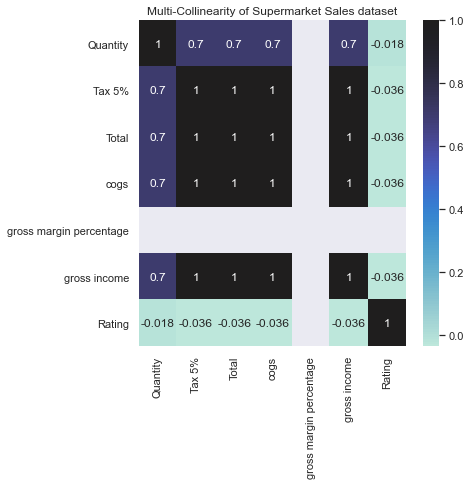

In [21]:
corr=df.corr()                                        #create a var corr defining corr() method for correlation
fig=plot.subplots(figsize=(6,6))                           #defined figure size for better view
# mask=np.triu(np.ones_like(corr,dtype=bool))               #creating a mask which hides the lower triangular matrix
x=sns.heatmap(corr,annot=True,center=True)      #plot the heatmap by calling the corr variable defined above
x.set_title("Multi-Collinearity of Supermarket Sales dataset") #title for our heatmap

In [22]:
#checking if gross margin percentage is 
df['gross margin percentage'].value_counts()


4.761905    984
Name: gross margin percentage, dtype: int64

Here we can see that there is no relation between gross margin percentage and the gross margin percentage is same for all the rows we can remove the variable.

In [23]:
#Here we are dropping the column permenantly
df.drop(['gross margin percentage'],axis=1,inplace=True)

In [132]:
#Renaming the column cogs as Sales for easy understanding
df.rename(columns={'cogs':'Sales'},inplace=True)
df

C:\Users\PARLA\anaconda3.0\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Branch,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Sales,gross income,Rating,Weekday
0,A,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,26.1415,9.1,Saturday
1,C,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 13:08:00,Cash,76.40,3.8200,9.6,Friday
2,A,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:08:00,Credit card,324.31,16.2155,7.4,Sunday
3,A,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 13:08:00,Ewallet,465.76,23.2880,8.4,Sunday
4,A,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 13:08:00,Ewallet,604.17,30.2085,5.3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,Male,PD1,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:08:00,Ewallet,40.35,2.0175,6.2,Tuesday
996,B,Normal,Female,PD3,97.38,10,48.6900,1022.4900,2019-03-02,1900-01-01 13:08:00,Ewallet,973.80,48.6900,4.4,Saturday
997,A,Member,Male,PD5,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:08:00,Cash,31.84,1.5920,7.7,Saturday
998,A,Normal,Male,PD3,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 13:08:00,Cash,65.82,3.2910,4.1,Friday


Checking the Data after Removing null values and unnecessary Columns
----

In [24]:
df.columns

Index(['Branch', 'Customer type', 'Gender', 'Product code', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross income', 'Rating', 'Weekday'],
      dtype='object')

In [25]:
df.shape

(984, 15)

In [138]:
df.size

14760

Text(0.5, 1.0, 'Multi-Collinearity of Supermarket Sales dataset')

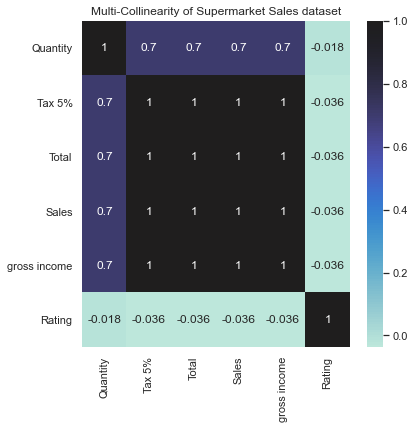

In [133]:
#Now checking corelation after Adjusting the Dataframe

corr=df.corr()                                        #create a var corr defining corr() method for correlation
fig=plot.subplots(figsize=(6,6))                           #defined figure size for better view
# mask=np.triu(np.ones_like(corr,dtype=bool))               #creating a mask which hides the lower triangular matrix
x=sns.heatmap(corr,annot=True,center=True)      #plot the heatmap by calling the corr variable defined above
x.set_title("Multi-Collinearity of Supermarket Sales dataset") #title for our heatmap

Here we can see that rating and has less corelation compared to other variables 

In [26]:
#checking for normality 
pg.normality(df)

,W,pval,normal
Quantity,0.932843,1.298598e-20,False
Tax 5%,0.907784,6.276202e-24,False
Total,0.907783,6.276020e-24,False
cogs,0.907783,6.276020e-24,False
gross income,0.907784,6.276202e-24,False
Rating,0.958193,3.770295e-16,False


as we can see no column is normally distributed but going to check them using visual interpretation

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>,
        <AxesSubplot:title={'center':'Total'}>],
       [<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'cogs'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

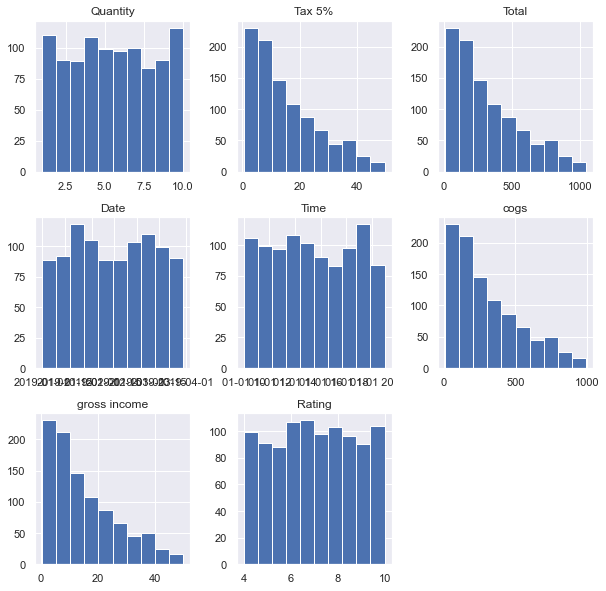

In [27]:
df.hist(figsize=(10,10))

Here we can see from the above graph that no data is normally distributed

Checking for outliers using boxplot

Quantity           AxesSubplot(0.125,0.125;0.110714x0.755)
Tax 5%          AxesSubplot(0.257857,0.125;0.110714x0.755)
Total           AxesSubplot(0.390714,0.125;0.110714x0.755)
Sales           AxesSubplot(0.523571,0.125;0.110714x0.755)
gross income    AxesSubplot(0.656429,0.125;0.110714x0.755)
Rating          AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

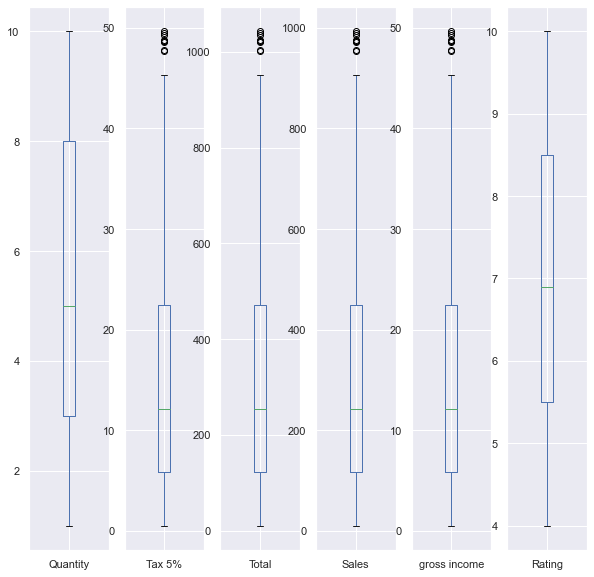

In [140]:
df.plot(kind='box',subplots=True,figsize=(10,10))


here we can see that there are outliers in 'tax5%','Sales','Total','grossincome'
So we are going to remove those outliers.

In [141]:
Q1=np.percentile(df['Tax 5%'],25,interpolation='midpoint')
Q2=np.percentile(df['Tax 5%'],50,interpolation='midpoint')
Q3=np.percentile(df['Tax 5%'],75,interpolation='midpoint')

IQR=Q3-Q1

print('The Inter Quartile Range is :',IQR)

Upper_limit=Q3+1.5*IQR
Lower_limit=Q1-1.5*IQR

print('Low limit is:',Lower_limit)
print('Up limit is:',Upper_limit)
df = df[ (df['Tax 5%'] > Lower_limit) & (df['Tax 5%'] < Upper_limit)]
df

The Inter Quartile Range is : 16.595750000000002
Low limit is: -19.060375000000004
Up limit is: 47.322625


,Branch,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Sales,gross income,Rating,Weekday
0,A,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,26.1415,9.1,Saturday
1,C,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 13:08:00,Cash,76.40,3.8200,9.6,Friday
2,A,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:08:00,Credit card,324.31,16.2155,7.4,Sunday
3,A,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 13:08:00,Ewallet,465.76,23.2880,8.4,Sunday
4,A,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 13:08:00,Ewallet,604.17,30.2085,5.3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,C,Member,Female,PD2,60.95,1,3.0475,63.9975,2019-02-18,1900-01-01 13:08:00,Ewallet,60.95,3.0475,5.9,Monday
995,C,Normal,Male,PD1,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:08:00,Ewallet,40.35,2.0175,6.2,Tuesday
997,A,Member,Male,PD5,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:08:00,Cash,31.84,1.5920,7.7,Saturday
998,A,Normal,Male,PD3,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 13:08:00,Cash,65.82,3.2910,4.1,Friday


In [142]:
Q1=np.percentile(df['Total'],25,interpolation='midpoint')
Q2=np.percentile(df['Total'],50,interpolation='midpoint')
Q3=np.percentile(df['Total'],75,interpolation='midpoint')

IQR=Q3-Q1

print('The Inter Quartile Range is :',IQR)

Upper_limit=Q3+1.5*IQR
Lower_limit=Q1-1.5*IQR

print('Low limit is:',Lower_limit)
print('Up limit is:',Upper_limit)
df = df[ (df['Total'] > Lower_limit) & (df['Total'] < Upper_limit)]
df

The Inter Quartile Range is : 341.3235
Low limit is: -390.2587500000001
Up limit is: 975.0352500000001


,Branch,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Sales,gross income,Rating,Weekday
0,A,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,26.1415,9.1,Saturday
1,C,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 13:08:00,Cash,76.40,3.8200,9.6,Friday
2,A,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:08:00,Credit card,324.31,16.2155,7.4,Sunday
3,A,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 13:08:00,Ewallet,465.76,23.2880,8.4,Sunday
4,A,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 13:08:00,Ewallet,604.17,30.2085,5.3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,C,Member,Female,PD2,60.95,1,3.0475,63.9975,2019-02-18,1900-01-01 13:08:00,Ewallet,60.95,3.0475,5.9,Monday
995,C,Normal,Male,PD1,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:08:00,Ewallet,40.35,2.0175,6.2,Tuesday
997,A,Member,Male,PD5,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:08:00,Cash,31.84,1.5920,7.7,Saturday
998,A,Normal,Male,PD3,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 13:08:00,Cash,65.82,3.2910,4.1,Friday


In [143]:
Q1=np.percentile(df['gross income'],25,interpolation='midpoint')
Q2=np.percentile(df['gross income'],50,interpolation='midpoint')
Q3=np.percentile(df['gross income'],75,interpolation='midpoint')

IQR=Q3-Q1

print('The Inter Quartile Range is :',IQR)

Upper_limit=Q3+1.5*IQR
Lower_limit=Q1-1.5*IQR

print('Low limit is:',Lower_limit)
print('Up limit is:',Upper_limit)
df = df[ (df['gross income'] > Lower_limit) & (df['gross income'] < Upper_limit)]
df

The Inter Quartile Range is : 16.253500000000003
Low limit is: -18.583750000000002
Up limit is: 46.43025


,Branch,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Sales,gross income,Rating,Weekday
0,A,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,26.1415,9.1,Saturday
1,C,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 13:08:00,Cash,76.40,3.8200,9.6,Friday
2,A,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:08:00,Credit card,324.31,16.2155,7.4,Sunday
3,A,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 13:08:00,Ewallet,465.76,23.2880,8.4,Sunday
4,A,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 13:08:00,Ewallet,604.17,30.2085,5.3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,C,Member,Female,PD2,60.95,1,3.0475,63.9975,2019-02-18,1900-01-01 13:08:00,Ewallet,60.95,3.0475,5.9,Monday
995,C,Normal,Male,PD1,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:08:00,Ewallet,40.35,2.0175,6.2,Tuesday
997,A,Member,Male,PD5,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:08:00,Cash,31.84,1.5920,7.7,Saturday
998,A,Normal,Male,PD3,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 13:08:00,Cash,65.82,3.2910,4.1,Friday


In [144]:
Q1=np.percentile(df['Sales'],25,interpolation='midpoint')
Q2=np.percentile(df['Sales'],50,interpolation='midpoint')
Q3=np.percentile(df['Sales'],75,interpolation='midpoint')

IQR=Q3-Q1

print('The Inter Quartile Range is :',IQR)

Upper_limit=Q3+1.5*IQR
Lower_limit=Q1-1.5*IQR

print('Low limit is:',Lower_limit)
print('Up limit is:',Upper_limit)
df = df[ (df['Sales'] > Lower_limit) & (df['Sales'] < Upper_limit)]
df

The Inter Quartile Range is : 325.07
Low limit is: -371.675
Up limit is: 928.605


,Branch,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Sales,gross income,Rating,Weekday
0,A,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,26.1415,9.1,Saturday
1,C,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 13:08:00,Cash,76.40,3.8200,9.6,Friday
2,A,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:08:00,Credit card,324.31,16.2155,7.4,Sunday
3,A,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 13:08:00,Ewallet,465.76,23.2880,8.4,Sunday
4,A,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 13:08:00,Ewallet,604.17,30.2085,5.3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,C,Member,Female,PD2,60.95,1,3.0475,63.9975,2019-02-18,1900-01-01 13:08:00,Ewallet,60.95,3.0475,5.9,Monday
995,C,Normal,Male,PD1,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:08:00,Ewallet,40.35,2.0175,6.2,Tuesday
997,A,Member,Male,PD5,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:08:00,Cash,31.84,1.5920,7.7,Saturday
998,A,Normal,Male,PD3,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 13:08:00,Cash,65.82,3.2910,4.1,Friday


Checking whether all the outliers are remove or not

Quantity           AxesSubplot(0.125,0.125;0.110714x0.755)
Tax 5%          AxesSubplot(0.257857,0.125;0.110714x0.755)
Total           AxesSubplot(0.390714,0.125;0.110714x0.755)
Sales           AxesSubplot(0.523571,0.125;0.110714x0.755)
gross income    AxesSubplot(0.656429,0.125;0.110714x0.755)
Rating          AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

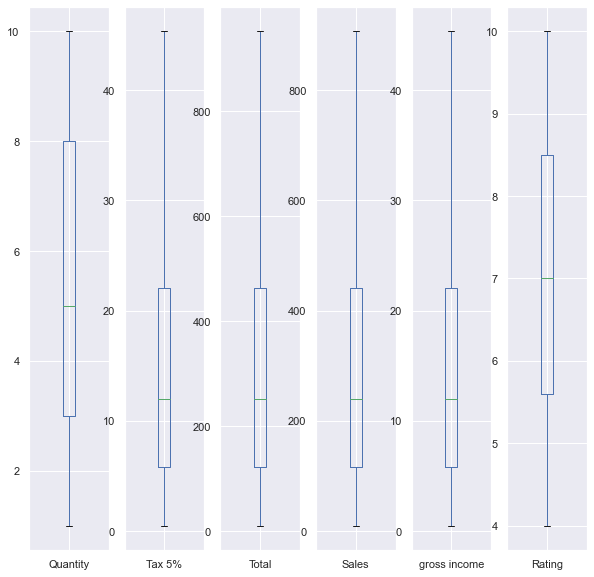

In [145]:
df.plot(kind='box',subplots=True,figsize=(10,10))

checking the relation ship between the numerical features

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Relation ship of Sales with tax 5%'}, xlabel='Sales', ylabel='Tax 5%'>

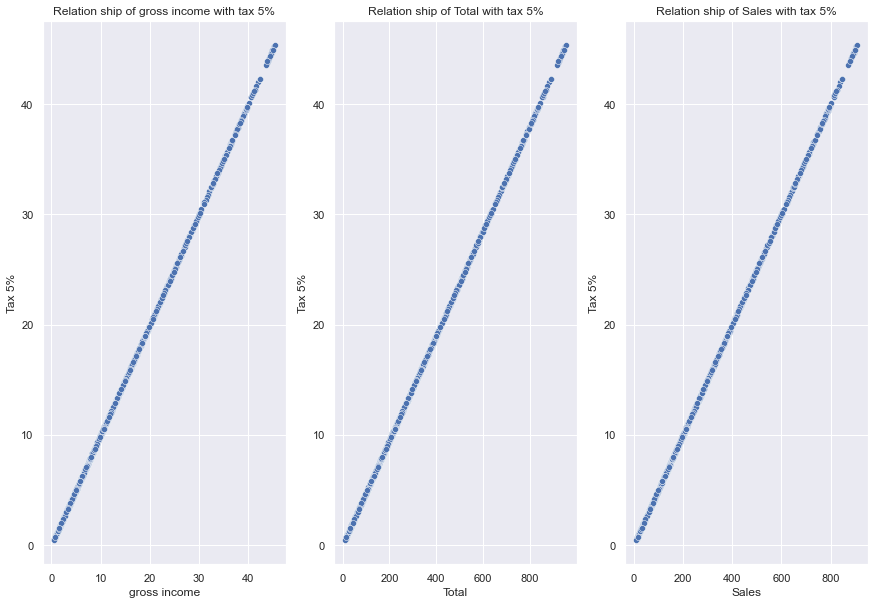

In [165]:
plot.subplots(figsize=(20,10))
plot.subplot(141)
plot.title('Relation ship of gross income with tax 5%')
sns.scatterplot(df['gross income'],df['Tax 5%'])
plot.subplot(142)
plot.title('Relation ship of Total with tax 5%')
sns.scatterplot(df['Total'],df['Tax 5%'])
plot.subplot(143)
plot.title('Relation ship of Sales with tax 5%')
sns.scatterplot(df['Sales'],df['Tax 5%'])


C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Relation ship of Sales with tax 5%'}, xlabel='Sales', ylabel='gross income'>

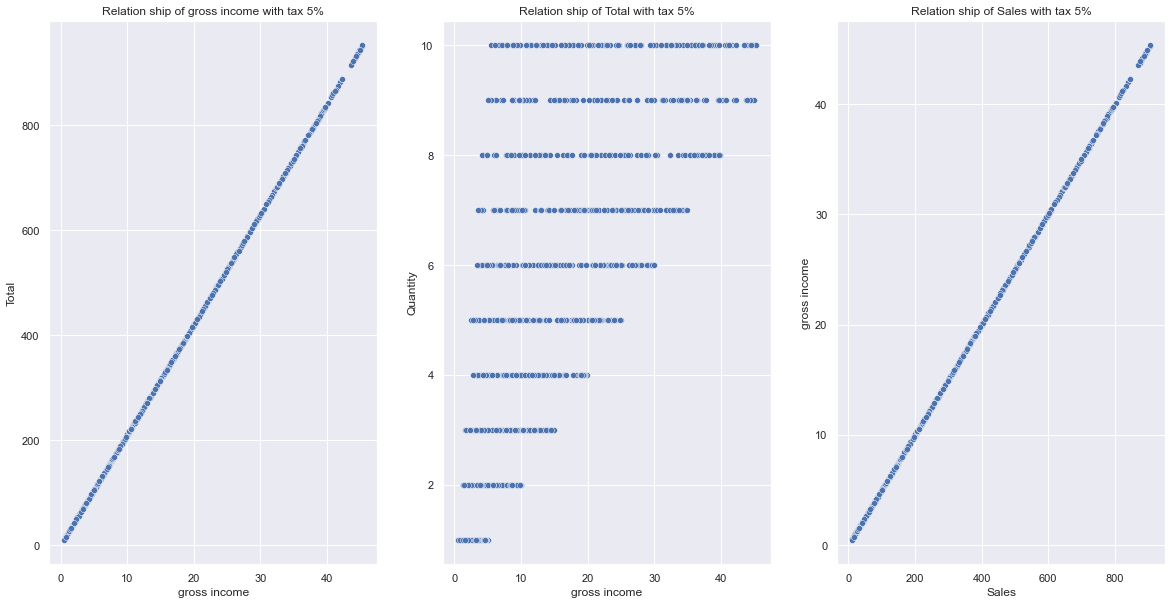

In [166]:
plot.subplots(figsize=(20,10))
plot.subplot(131)
plot.title('Relation ship of gross income with tax 5%')
sns.scatterplot(df['gross income'],df['Total'])
plot.subplot(132)
plot.title('Relation ship of Total with tax 5%')
sns.scatterplot(df['gross income'],df['Quantity'])
plot.subplot(133)
plot.title('Relation ship of Sales with tax 5%')
sns.scatterplot(df['Sales'],df['gross income'])


There is no relation ship between gross income and Quantity

checking how many males and females are present in the data frame and who are highest?
----

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Female    488
Male      487
Name: Gender, dtype: int64

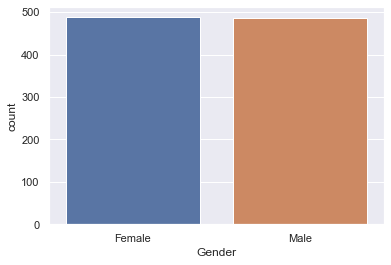

In [39]:
sns.countplot(df['Gender'])
df['Gender'].value_counts()

Checking whose branches are sold highest.
---

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


A    332
B    327
C    316
Name: Branch, dtype: int64

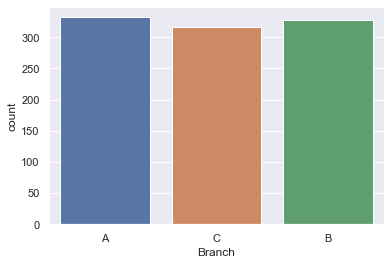

In [40]:
sns.countplot(df['Branch'])
df['Branch'].value_counts()

Here we can see that Branch A followed by b and c is sold high quantity 

In [41]:
#groupong the data frame on Branch
br=df.groupby('Branch').sum()
br

,Quantity,Tax 5%,Total,Sales,gross income,Rating
Branch,,,,,,
A,1810,4887.6830,102641.3430,97753.66,4887.6830,2334.0
B,1783,4922.6965,103376.6265,98453.93,4922.6965,2226.5
C,1729,4867.9070,102226.0470,97358.14,4867.9070,2246.3


C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='Quantity'>

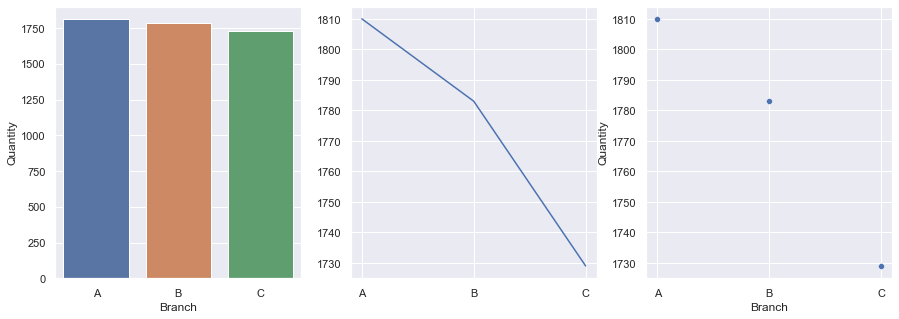

In [42]:
#Visual representation of the quantity sold based on branches
x=br.index
y=br['Quantity']
plot.subplots(figsize=(15,5))
plot.subplot(131)
sns.barplot(x,y)
plot.subplot(132)
plot.plot(x,y)
plot.subplot(133)
sns.scatterplot(x,y)

Here we can see that Branch A has highest quantity sold 

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='Total'>

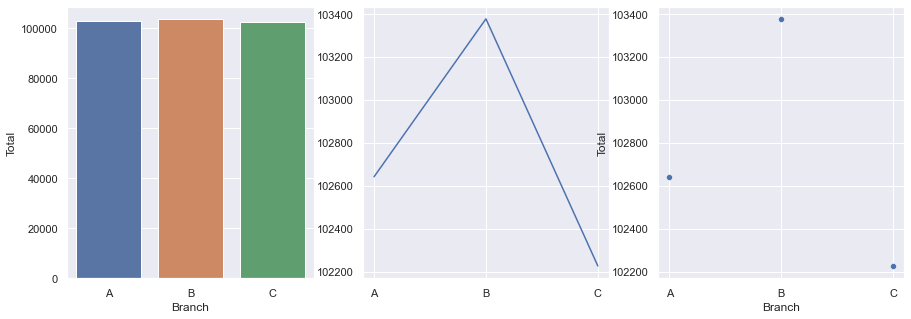

In [43]:
##Visual representation of the Total Sales based on branches
x=br.index
y=br['Total']
plot.subplots(figsize=(15,5))
plot.subplot(131)
sns.barplot(x,y)
plot.subplot(132)
plot.plot(x,y)
plot.subplot(133)
sns.scatterplot(x,y)

Here we can see that Branch B has highest Total Sales 
So we can build some infra structure to increase facilities for people 
So we can build some infra structure for other branches to increase the Sales

Checking the Quantity sold based on Branch and Gender
---

Gender,Female,Male
Branch,,
A,887,923
B,877,906
C,1000,729


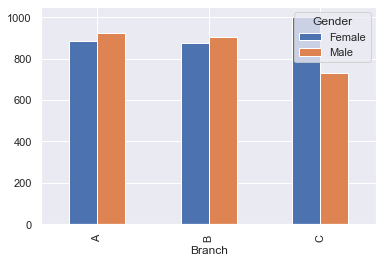

In [167]:
sold=pd.crosstab(df['Branch'],df['Gender'],values=df['Quantity'],aggfunc='sum')
sold.plot(kind='bar')
sold

in Branch A Male has bought more Quantity so it would be better if you have provide with sales on female products to attract women
In branch B Male has Bought more Quantity so it would be better if you have provide with sales on female products to attract women
In branch C Females has bought more Quantity so it would be better if you have provide with sales on male products to attract men

Average Ratings of different cities based on different branches
--

Text(0.5, 1.0, 'Average ratings of different products in different cities')

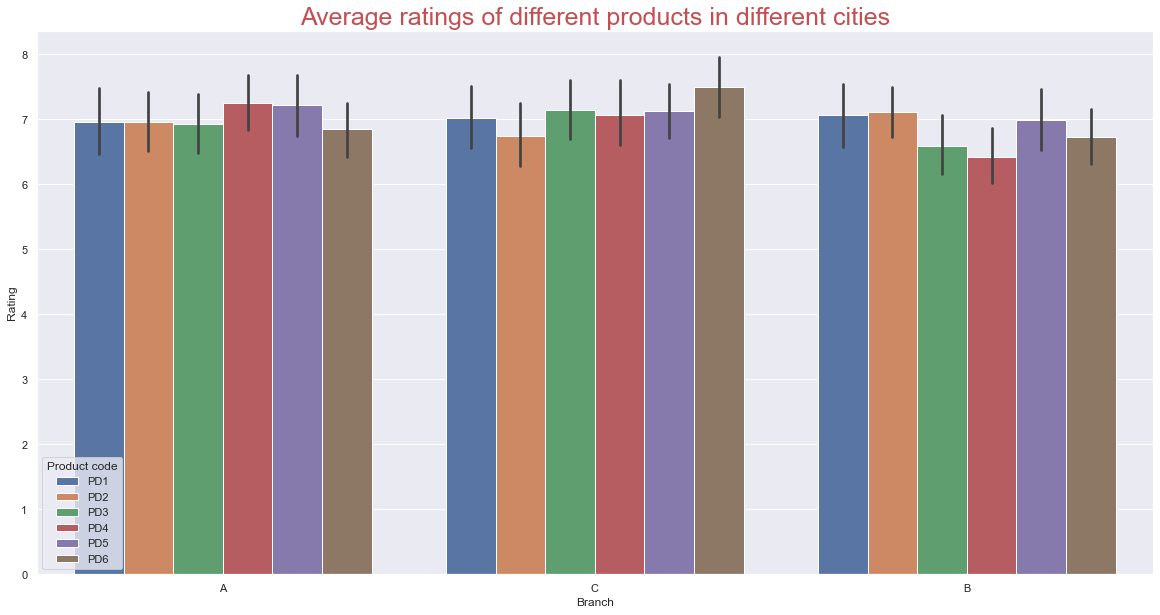

In [168]:
plot.figure(figsize=(20,10))
sns.barplot(x=df['Branch'],y=df['Rating'],hue=df['Product code'])
plot.title('Average ratings of different products in different cities',fontsize=25,c='r')


Branch A PD4 has highest Rating
Branch B PD2 has highest Rating
Branch C PD6 has highest Rating

Sales of Products in three Cities of varies branches.
---

Text(0.5, 1.0, 'Sales of products in three cities')

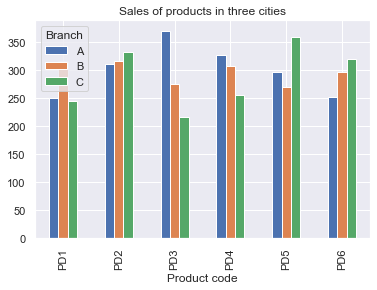

In [49]:
pdsold=pd.crosstab(df['Product code'],df['Branch'],values=df['Quantity'],aggfunc='sum')
pdsold.plot(kind='bar')
plot.title('Sales of products in three cities')

Here we can see that:
PD1 is highest in Branch B so rates can be increased a little
PD2 is highest in Branch C so rates can be increased a little
PD3 is highest in Branch A so rates can be increased a little
PD4 is highest in Branch A so rates can be increased a little
PD5 is highest in Branch C so rates can be increased a little
PD6 is highest in Branch C so rates can be increased a little

Counting Number of Customers based on Gender
--

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Customer type  Gender
Member         Female    253
Normal         Male      251
Member         Male      236
Normal         Female    235
dtype: int64

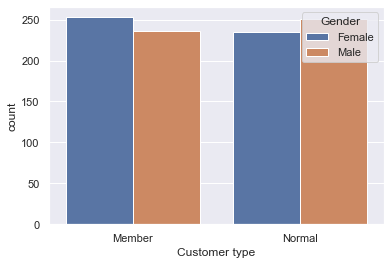

In [50]:
sns.countplot(df['Customer type'],hue=df['Gender'])
customer_Gen=df[['Customer type','Gender']]
customer_Gen.value_counts()

Here we can see There are highest female Members
and Highest normal members
So it would be great if more female products are bought than Male Products 

Quantity Sold in different branches in different days.
--

Text(0.5, 1.0, 'Quantity Sold in different branches in different days')

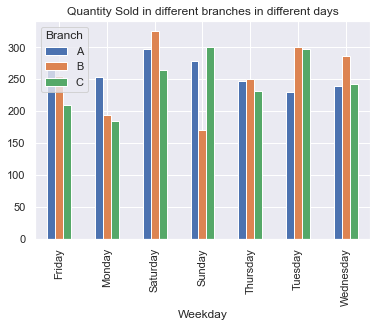

In [171]:
week=pd.crosstab(df['Weekday'],df['Branch'],values=df['Quantity'],aggfunc=sum)
week.plot(kind='bar')
plot.title('Quantity Sold in different branches in different days')

IN Friday Branch A has sold highest Quantity
IN Monday Branch A has sold highest Quantity
IN Saturday Branch B has sold highest Quantity
IN Sunday Branch C has sold highest Quantity
IN Thursday Branch B has sold highest Quantity
IN Tuesday Branch B has sold highest Quantity
IN Wednesday Branch B has sold highest Quantity

C:\Users\PARLA\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekday', ylabel='count'>

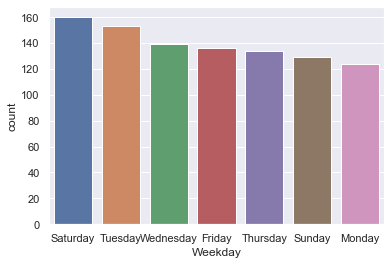

In [172]:
#Checking the Sales among all the weeks
sns.countplot(df['Weekday'],order=df['Weekday'].value_counts().index)

Here Saturday has the highest sales among all weeks
So it would be better if the number of employees are increased on saturday and number of staffs are reduced on monday. 

Checking the time trend of the gross income
---

Text(0.5, 1.0, 'Time Trend in Gross income')

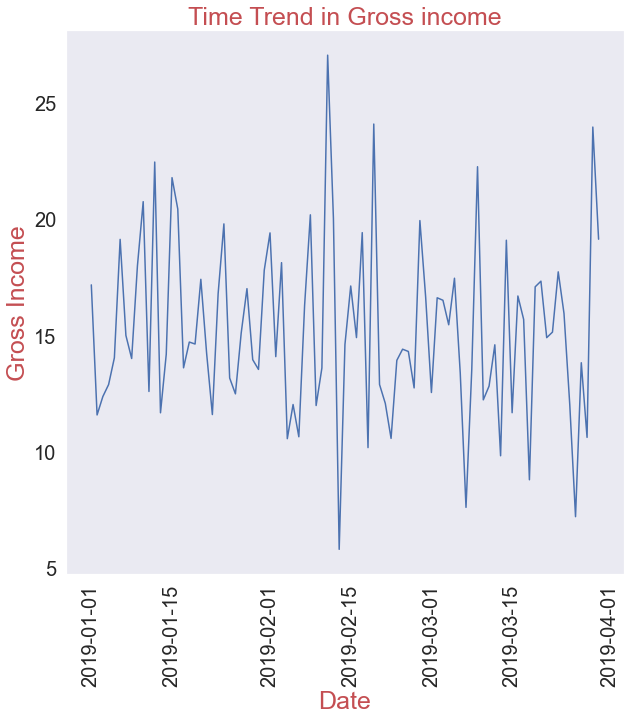

In [36]:
plot.figure(figsize=(10,10))
df.groupby(df.index).mean() 
sns.lineplot(x= df.groupby(df.index).mean().index, 
             y = df.groupby(df.index).mean()['gross income'], palette='set2') #here we are using line plot as line plot is best way to show the time trend for gross income.
plot.grid()
plot.ylabel("Gross Income",fontsize=25,c='r')
plot.xticks(rotation='vertical',fontsize=20)
plot.xlabel('Date',fontsize=25,c='r')
plot.yticks(fontsize=20)
plot.title('Time Trend in Gross income',fontsize=25,c='r')
#No particular time trend is observed except for some days when the gross income is pretty high or pretty low. Overall it remains at a certain average level.